2025-01-03 10:09:47,219 - INFO - Logger set up complete.
C:\Users\Robel\AppData\Local\Temp\ipykernel_9368\2818501655.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('D:/week4 data/train.csv')
2025-01-03 10:09:49,858 - INFO - 'Promo' distribution in training set calculated:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
2025-01-03 10:09:49,862 - INFO - 'Promo' distribution in test set calculated:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64
2025-01-03 10:09:49,865 - INFO - Creating visualizations for 'Promo' distributions in training and test sets.


Promo Distribution in Training Set:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

Promo Distribution in Test Set:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


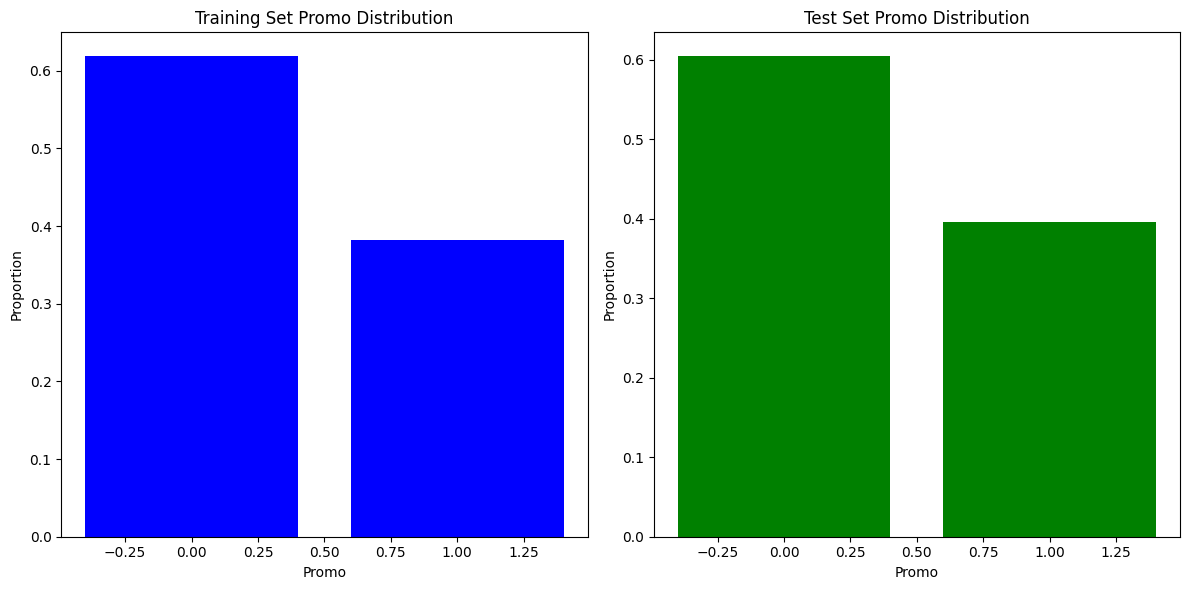

In [1]:
import logging

# Set up the logger
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

logger.info("Logger set up complete.")

import pandas as pd

# Load the datasets
df_train = pd.read_csv('D:/week4 data/train.csv')
df_test = pd.read_csv('D:/week4 data/test.csv')

# Calculate the distribution of 'Promo' in the training set
promo_train_distribution = df_train['Promo'].value_counts(normalize=True)
logger.info("'Promo' distribution in training set calculated:\n%s", promo_train_distribution)

# Calculate the distribution of 'Promo' in the test set
promo_test_distribution = df_test['Promo'].value_counts(normalize=True)
logger.info("'Promo' distribution in test set calculated:\n%s", promo_test_distribution)

# Print the distributions
print("Promo Distribution in Training Set:")
print(promo_train_distribution)

print("\nPromo Distribution in Test Set:")
print(promo_test_distribution)

# Compare the distributions visually
logger.info("Creating visualizations for 'Promo' distributions in training and test sets.")
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot training set distribution
axes[0].bar(promo_train_distribution.index, promo_train_distribution.values, color='b')
axes[0].set_title('Training Set Promo Distribution')
axes[0].set_xlabel('Promo')
axes[0].set_ylabel('Proportion')

# Plot test set distribution
axes[1].bar(promo_test_distribution.index, promo_test_distribution.values, color='g')
axes[1].set_title('Test Set Promo Distribution')
axes[1].set_xlabel('Promo')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

C:\Users\Robel\AppData\Local\Temp\ipykernel_9368\2978026147.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('D:/week4 data/train.csv')
2025-01-03 10:14:58,343 - INFO - Holiday dates set: DatetimeIndex(['2014-12-25', '2015-01-01'], dtype='datetime64[ns]', freq=None)


Sample Categorized Dates:
             Date SalesPeriod
999601 2013-01-16     Regular
995965 2013-01-20     Regular
985837 2013-01-29     Regular
950745 2013-03-01     Regular
927991 2013-03-22     Regular
894381 2013-04-21     Regular
889991 2013-04-25     Regular
886574 2013-04-28     Regular
886672 2013-04-28     Regular
864801 2013-05-17     Regular
859557 2013-05-22     Regular
850494 2013-05-30     Regular
847687 2013-06-02     Regular
839256 2013-06-09     Regular
828684 2013-06-19     Regular
798902 2013-07-15     Regular
794197 2013-07-20     Regular
756833 2013-08-22     Regular
753189 2013-08-25     Regular
750768 2013-08-27     Regular
694251 2013-10-17     Regular
664908 2013-11-12     Regular
617824 2013-12-25     Regular
577391 2014-01-30     Regular
557385 2014-02-17     Regular
544313 2014-03-01     Regular
542840 2014-03-02     Regular
493003 2014-04-16     Regular
485574 2014-04-22     Regular
462798 2014-05-13     Regular
450770 2014-05-24     Regular
415963 2014-06

2025-01-03 10:16:27,024 - INFO - Creating visualization for sales behavior.


Average Sales for Each Period:
SalesPeriod
After Holiday     5050.877220
Before Holiday    8231.450115
During Holiday     166.188235
Regular           5773.479626
Name: Sales, dtype: float64


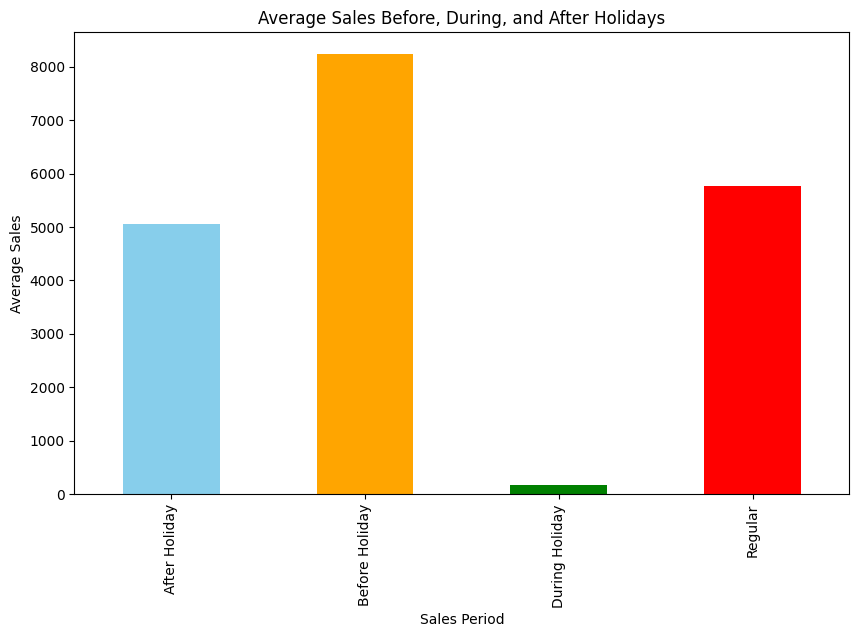

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_train = pd.read_csv('D:/week4 data/train.csv')

# Convert 'Date' column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

# List of holidays (example dates, Christmas, New Year  holiday dates)
holidays = pd.to_datetime(['2014-12-25', '2015-01-01'])
logger.info("Holiday dates set: %s", holidays)

# Define a function to categorize sales period
def categorize_sales_period(date, holidays):
    for holiday in holidays:
        if date == holiday:
            return 'During Holiday'
        elif holiday - pd.Timedelta(days=7) <= date < holiday:
            return 'Before Holiday'
        elif holiday < date <= holiday + pd.Timedelta(days=7):
            return 'After Holiday'
    return 'Regular'

# Apply the function to categorize sales periods
df_train['SalesPeriod'] = df_train['Date'].apply(lambda x: categorize_sales_period(x, holidays))

# Check a detailed sample of categorized dates
sample_dates = df_train[['Date', 'SalesPeriod']].sample(50, random_state=1).sort_values(by='Date')
print("Sample Categorized Dates:")
print(sample_dates)

# Calculate average sales for each period
sales_behavior = df_train.groupby('SalesPeriod')['Sales'].mean()

# Print the sales behavior
print("Average Sales for Each Period:")
print(sales_behavior)

# Visualize the sales behavior
logger.info("Creating visualization for sales behavior.")
sales_behavior.plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'], figsize=(10, 6))
plt.title('Average Sales Before, During, and After Holidays')
plt.xlabel('Sales Period')
plt.ylabel('Average Sales')
plt.show()

C:\Users\Robel\AppData\Local\Temp\ipykernel_9368\544373847.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('D:/week4 data/train.csv')
2025-01-03 10:32:24,067 - INFO - Holiday dates set: {'Christmas': DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25'], dtype='datetime64[ns]', freq=None), 'Easter': DatetimeIndex(['2013-03-31', '2014-04-20', '2015-04-05'], dtype='datetime64[ns]', freq=None), 'NewYear': DatetimeIndex(['2014-01-01', '2015-01-01'], dtype='datetime64[ns]', freq=None)}
2025-01-03 10:34:25,596 - INFO - Average sales calculated for Christmas:
SalesPeriod_Christmas
After Holiday     3803.985960
Before Holiday    8372.926341
During Holiday     145.351707
Regular           5776.721641
Name: Sales, dtype: float64
2025-01-03 10:36:55,103 - INFO - Average sales calculated for Easter:
SalesPeriod_Easter
After Holiday     4271.853086
Before Holiday    6757.370916
During Holiday     173.521076
Regula


Average Sales for Christmas:
SalesPeriod_Christmas
After Holiday     3803.985960
Before Holiday    8372.926341
During Holiday     145.351707
Regular           5776.721641
Name: Sales, dtype: float64


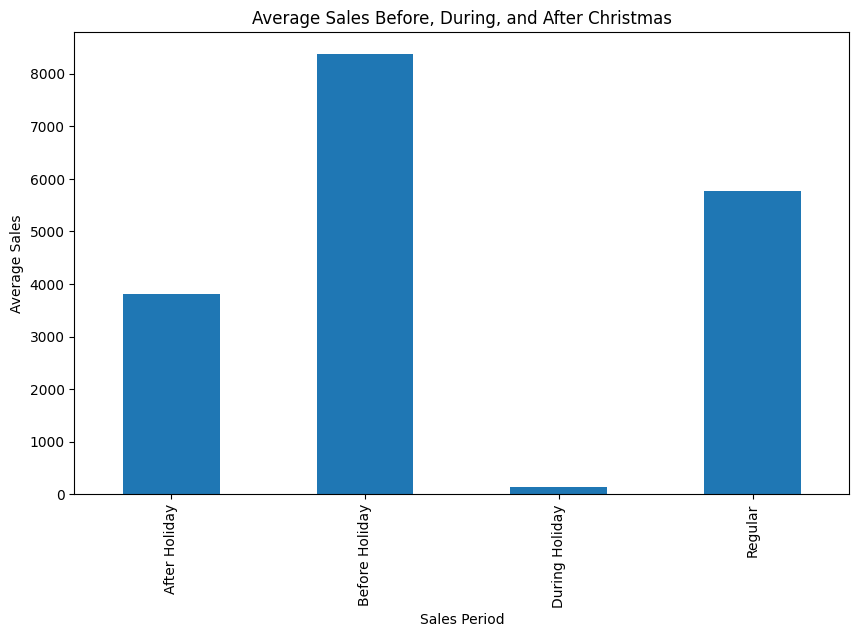

2025-01-03 10:38:47,616 - INFO - Creating visualization for sales behavior during Easter.



Average Sales for Easter:
SalesPeriod_Easter
After Holiday     4271.853086
Before Holiday    6757.370916
During Holiday     173.521076
Regular           5805.743040
Name: Sales, dtype: float64


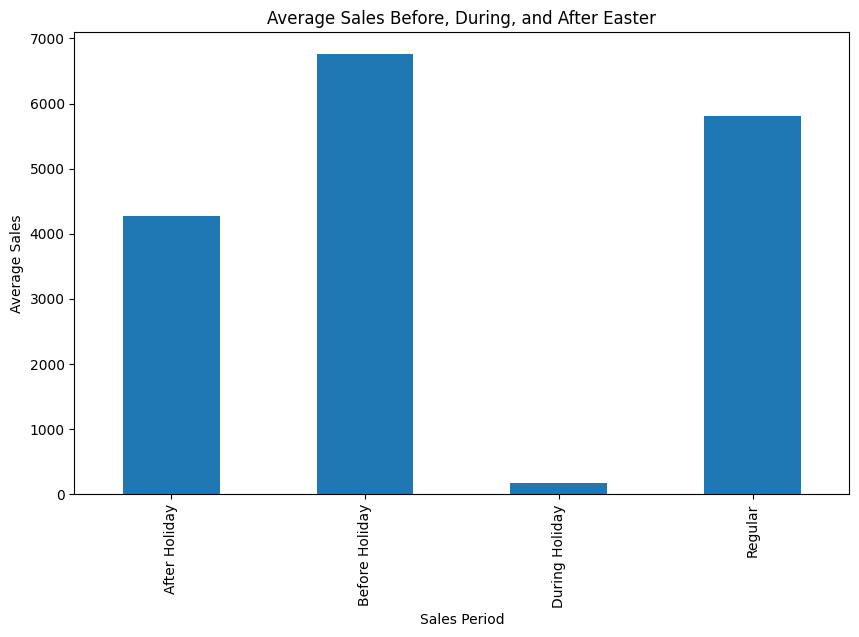

2025-01-03 10:38:48,046 - INFO - Creating visualization for sales behavior during NewYear.



Average Sales for NewYear:
SalesPeriod_NewYear
After Holiday     6187.161691
Before Holiday    3855.164948
During Holiday     111.331839
Regular           5808.039380
Name: Sales, dtype: float64


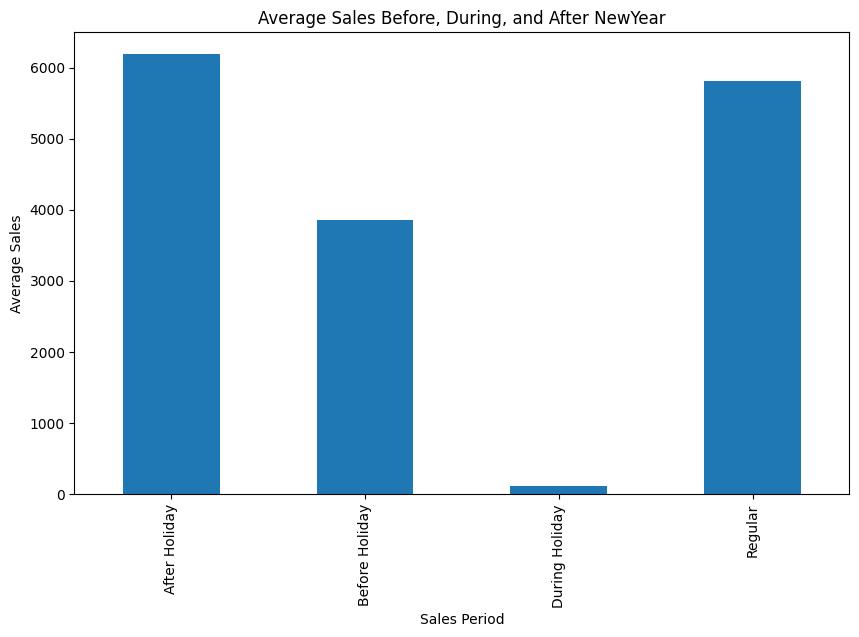

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_train = pd.read_csv('D:/week4 data/train.csv')

# Convert 'Date' column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

# List of holidays (example dates, christmas, New Year and Easter holiday dates)
holidays = {
    'Christmas': pd.to_datetime(['2013-12-25', '2014-12-25', '2015-12-25']),
    'Easter': pd.to_datetime(['2013-03-31', '2014-04-20', '2015-04-05']),
    'NewYear': pd.to_datetime(['2014-01-01', '2015-01-01']),
   
}
logger.info("Holiday dates set: %s", holidays)

# Define a function to categorize sales period
def categorize_sales_period(date, holiday_dates):
    for holiday in holiday_dates:
        if date == holiday:
            return 'During Holiday'
        elif holiday - pd.Timedelta(days=7) <= date < holiday:
            return 'Before Holiday'
        elif holiday < date <= holiday + pd.Timedelta(days=7):
            return 'After Holiday'
    return 'Regular'

# Analyze sales behavior for each holiday
sales_behavior = {}
for holiday_name, holiday_dates in holidays.items():
    df_train[f'SalesPeriod_{holiday_name}'] = df_train['Date'].apply(lambda x: categorize_sales_period(x, holiday_dates))
    sales_behavior[holiday_name] = df_train.groupby(f'SalesPeriod_{holiday_name}')['Sales'].mean()
    logger.info("Average sales calculated for %s:\n%s", holiday_name, sales_behavior[holiday_name])

# Print and visualize the sales behavior for each holiday

for holiday_name, behavior in sales_behavior.items():
    logger.info("Creating visualization for sales behavior during %s.", holiday_name)
    print(f"\nAverage Sales for {holiday_name}:")
    print(behavior)
    behavior.plot(kind='bar', title=f'Average Sales Before, During, and After {holiday_name}', figsize=(10, 6))
    plt.xlabel('Sales Period')
    plt.ylabel('Average Sales')
    plt.show()

C:\Users\Robel\AppData\Local\Temp\ipykernel_9368\380102389.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('D:/week4 data/train.csv')
2025-01-03 10:42:37,575 - INFO - Calculated correlation coefficient: 0.8947107733017028
2025-01-03 10:42:37,578 - INFO - Creating scatter plot to visualize the relationship between Sales and Number of Customers.


Correlation between Sales and Number of Customers: 0.8947107733017028


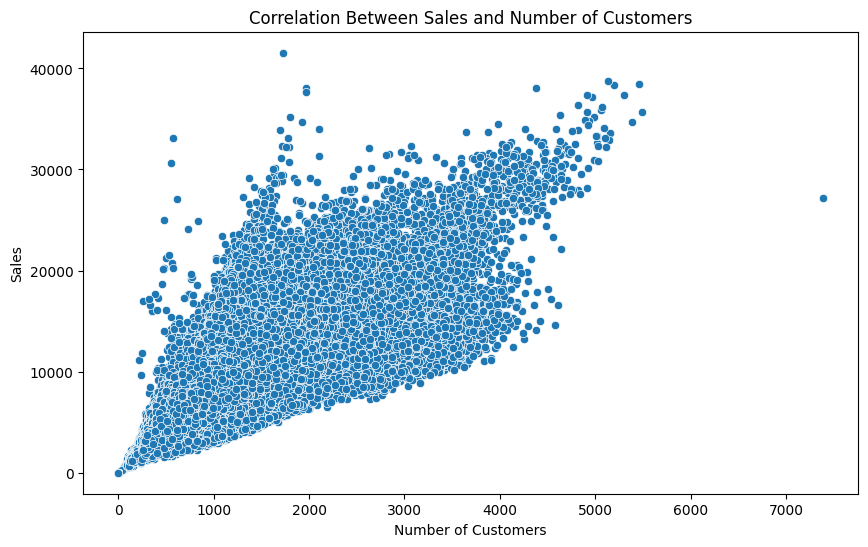

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_train = pd.read_csv('D:/week4 data/train.csv')

# Drop rows with missing values in 'Sales' or 'Customers'
df_train = df_train.dropna(subset=['Sales', 'Customers'])

# Calculate the correlation coefficient
correlation = df_train['Sales'].corr(df_train['Customers'])
logger.info("Calculated correlation coefficient: %s", correlation)
print(f'Correlation between Sales and Number of Customers: {correlation}')

# Visualize the relationship
logger.info("Creating scatter plot to visualize the relationship between Sales and Number of Customers.")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=df_train)
plt.title('Correlation Between Sales and Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


C:\Users\Robel\AppData\Local\Temp\ipykernel_9368\2831147623.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('D:/week4 data/train.csv')
2025-01-03 10:57:05,375 - INFO - Average Sales with and without Promotion calculated:
Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64
2025-01-03 10:57:05,436 - INFO - Average Number of Customers with and without Promotion calculated:
Promo
0    517.823542
1    820.098815
Name: Customers, dtype: float64


Average Sales with and without Promotion:
Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64
Average Number of Customers with and without Promotion:
Promo
0    517.823542
1    820.098815
Name: Customers, dtype: float64


C:\Users\Robel\AppData\Local\Temp\ipykernel_9368\2831147623.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales_per_customer = df_train.groupby('Promo').apply(lambda x: (x['Sales'] / x['Customers']).mean())
2025-01-03 10:57:05,714 - INFO - Average Sales per Customer with and without Promotion calculated:
Promo
0     8.941128
1    10.178907
dtype: float64


Average Sales per Customer with and without Promotion:
Promo
0     8.941128
1    10.178907
dtype: float64


2025-01-03 10:57:06,337 - INFO - Effectiveness of Promotions Across Stores calculated:
Promo             0             1
Store                            
1       3198.994845   5152.886111
2       2855.058419   6172.816667
3       3967.596220   8608.666667
4       6568.939863  10370.511111
5       2582.271478   5944.266667
...             ...           ...
1111    3073.487973   6395.294444
1112    5975.537801  12490.363889
1113    4400.362543   7320.086111
1114   14477.742268  21601.497222
1115    4082.221649   7073.266667

[1115 rows x 2 columns]
2025-01-03 10:57:06,350 - INFO - Stores with Highest Impact from Promotions (Sales Increase) calculated:
Store
198    3.258195
607    2.889831
543    2.759064
575    2.737234
271    2.620440
         ...   
353    1.045898
676    1.036924
948    1.028717
262    1.021504
274    0.938258
Length: 1115, dtype: float64
2025-01-03 10:57:06,356 - INFO - Creating bar plot for Average Sales with and without Promotion...


Effectiveness of Promotions Across Stores:
Promo             0             1
Store                            
1       3198.994845   5152.886111
2       2855.058419   6172.816667
3       3967.596220   8608.666667
4       6568.939863  10370.511111
5       2582.271478   5944.266667
...             ...           ...
1111    3073.487973   6395.294444
1112    5975.537801  12490.363889
1113    4400.362543   7320.086111
1114   14477.742268  21601.497222
1115    4082.221649   7073.266667

[1115 rows x 2 columns]
Stores with Highest Impact from Promotions (Sales Increase):
Store
198    3.258195
607    2.889831
543    2.759064
575    2.737234
271    2.620440
         ...   
353    1.045898
676    1.036924
948    1.028717
262    1.021504
274    0.938258
Length: 1115, dtype: float64


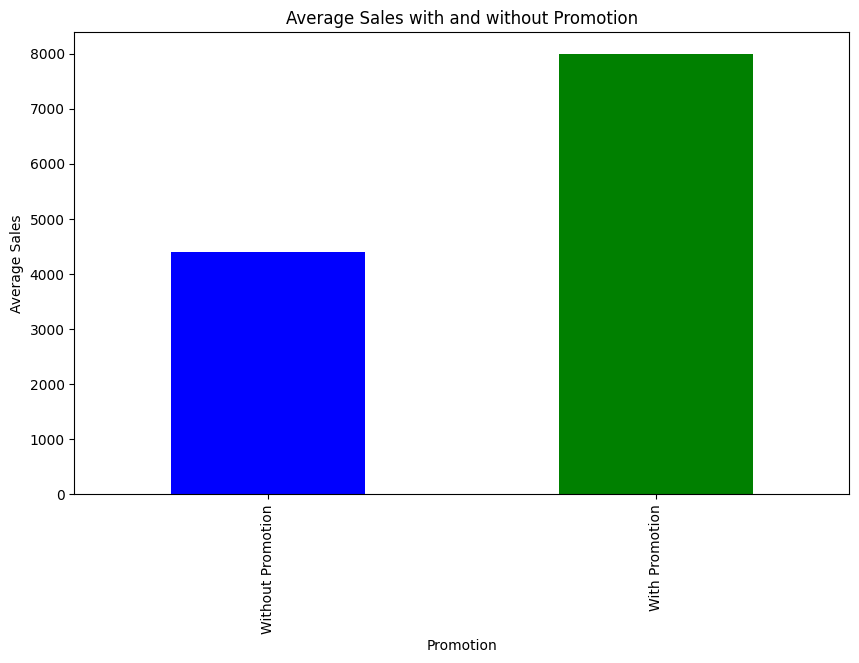

2025-01-03 10:57:06,657 - INFO - Creating bar plot for Average Number of Customers with and without Promotion...


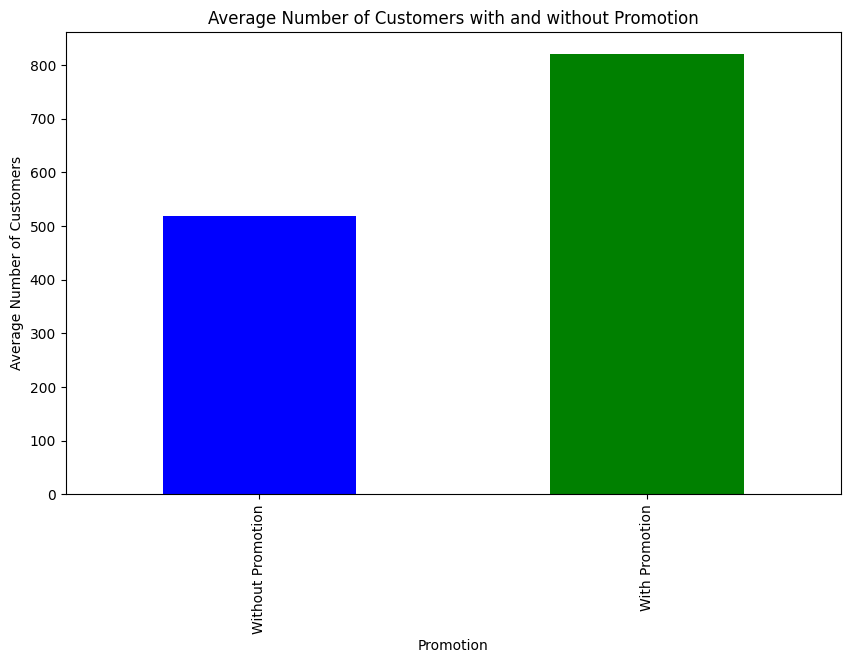

2025-01-03 10:57:06,968 - INFO - Creating bar plot for Effectiveness of Promotions Across Stores...


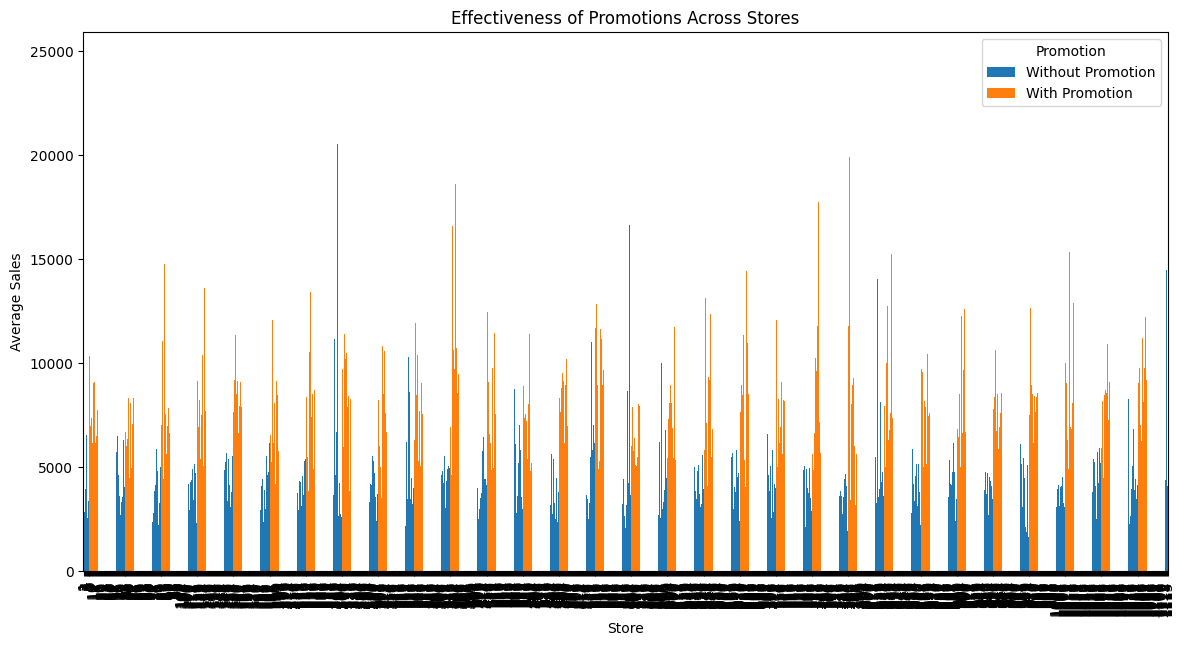

In [6]:
import pandas as pd

# Load the dataset
df_train = pd.read_csv('D:/week4 data/train.csv')

# Effect of Promotions on Sales
promo_sales = df_train.groupby('Promo')['Sales'].mean()
logger.info("Average Sales with and without Promotion calculated:\n%s", promo_sales)
print("Average Sales with and without Promotion:")
print(promo_sales)

# Impact on Customer Count
promo_customers = df_train.groupby('Promo')['Customers'].mean()
logger.info("Average Number of Customers with and without Promotion calculated:\n%s", promo_customers)
print("Average Number of Customers with and without Promotion:")
print(promo_customers)

# Effect on Existing Customers
sales_per_customer = df_train.groupby('Promo').apply(lambda x: (x['Sales'] / x['Customers']).mean())
logger.info("Average Sales per Customer with and without Promotion calculated:\n%s", sales_per_customer)
print("Average Sales per Customer with and without Promotion:")
print(sales_per_customer)

# Effectiveness of Promotion Deployment Across Stores
store_promo_effectiveness = df_train.groupby(['Store', 'Promo'])['Sales'].mean().unstack()
logger.info("Effectiveness of Promotions Across Stores calculated:\n%s", store_promo_effectiveness)
print("Effectiveness of Promotions Across Stores:")
print(store_promo_effectiveness)

# Determine Which Stores Should Have Promotions
promo_impact = store_promo_effectiveness[1] / store_promo_effectiveness[0]
logger.info("Stores with Highest Impact from Promotions (Sales Increase) calculated:\n%s", promo_impact.sort_values(ascending=False))
print("Stores with Highest Impact from Promotions (Sales Increase):")
print(promo_impact.sort_values(ascending=False))

import matplotlib.pyplot as plt

logger.info("Creating bar plot for Average Sales with and without Promotion...")
promo_sales.plot(kind='bar', color=['blue', 'green'], figsize=(10, 6))
plt.title('Average Sales with and without Promotion')
plt.xlabel('Promotion')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Without Promotion', 'With Promotion'])
plt.show()

logger.info("Creating bar plot for Average Number of Customers with and without Promotion...")
promo_customers.plot(kind='bar', color=['blue', 'green'], figsize=(10, 6))
plt.title('Average Number of Customers with and without Promotion')
plt.xlabel('Promotion')
plt.ylabel('Average Number of Customers')
plt.xticks([0, 1], ['Without Promotion', 'With Promotion'])
plt.show()

logger.info("Creating bar plot for Effectiveness of Promotions Across Stores...")
store_promo_effectiveness.plot(kind='bar', figsize=(14, 7))
plt.title('Effectiveness of Promotions Across Stores')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.legend(title='Promotion', labels=['Without Promotion', 'With Promotion'])
plt.show()


2025-01-03 11:01:42,795 - INFO - Customer data aggregated by day of the week:
DayOfWeek
Friday       743.150742
Monday       813.065791
Saturday     657.112237
Sunday        35.786817
Thursday     697.541486
Tuesday      760.984615
Wednesday    721.639666
Name: Customers, dtype: float64
2025-01-03 11:01:42,799 - INFO - Creating bar plot for daily customer behavior trends...


Average Number of Customers by Day of the Week:
DayOfWeek
Friday       743.150742
Monday       813.065791
Saturday     657.112237
Sunday        35.786817
Thursday     697.541486
Tuesday      760.984615
Wednesday    721.639666
Name: Customers, dtype: float64


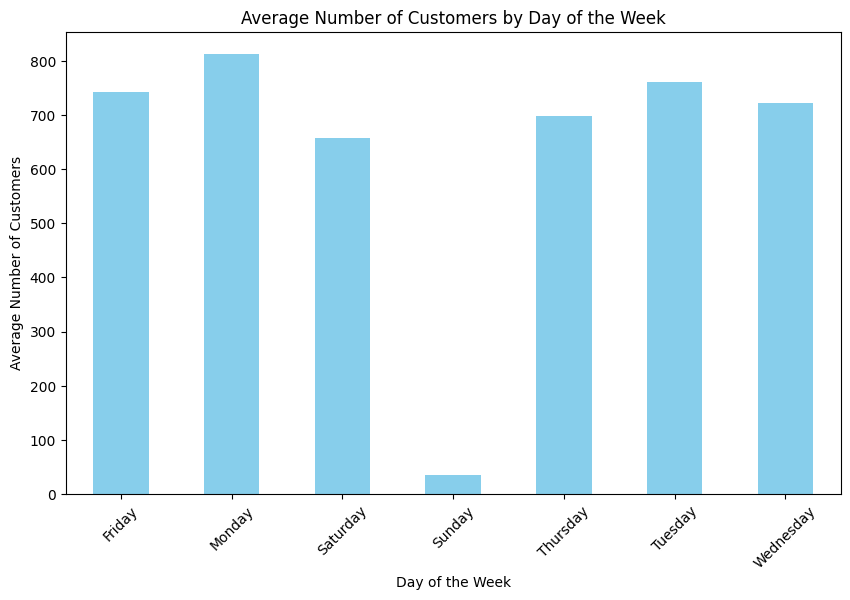

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_train = pd.read_csv('D:/week4 data/train.csv', low_memory=False)

# Convert 'Date' column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Extract day of the week
df_train['DayOfWeek'] = df_train['Date'].dt.day_name()

# Aggregate customer data by day of the week
daily_customer_behavior = df_train.groupby('DayOfWeek')['Customers'].mean()
logger.info("Customer data aggregated by day of the week:\n%s", daily_customer_behavior)
print("Average Number of Customers by Day of the Week:")
print(daily_customer_behavior)


# Visualize daily customer behavior trends
logger.info("Creating bar plot for daily customer behavior trends...")
daily_customer_behavior.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Number of Customers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=45)
plt.show()

2025-01-03 11:05:49,530 - INFO - Stores open on all weekdays identified:
[85, 262, 335, 423, 494, 562, 682, 733, 769, 1097]
2025-01-03 11:05:49,533 - INFO - Filtering data for stores open on all weekdays...
2025-01-03 11:05:49,723 - INFO - Average weekend sales calculated:
Store
85       8439.343284
262     22994.376866
335      8457.111940
423     11059.324627
494      6647.320896
562     16441.298507
682      7595.272388
733     14579.511194
769     10455.570896
1097     9602.000000
Name: Sales, dtype: float64


Stores open on all weekdays:
[85, 262, 335, 423, 494, 562, 682, 733, 769, 1097]


2025-01-03 11:05:49,732 - INFO - Creating bar plot for average weekend sales for stores open on all weekdays...


Average Weekend Sales for Stores Open on All Weekdays:
Store
85       8439.343284
262     22994.376866
335      8457.111940
423     11059.324627
494      6647.320896
562     16441.298507
682      7595.272388
733     14579.511194
769     10455.570896
1097     9602.000000
Name: Sales, dtype: float64


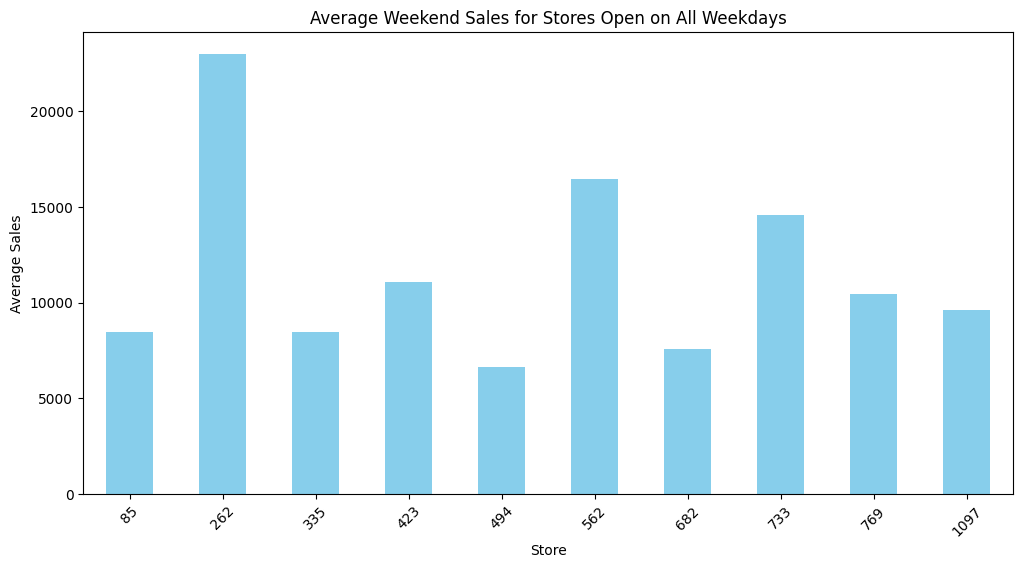

In [8]:
import pandas as pd

# Load the dataset
df_train = pd.read_csv('D:/week4 data/train.csv', low_memory=False)

# Convert 'Date' column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Extract day of the week
df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek

# Identify stores open on all weekdays
weekday_open_stores = df_train[df_train['DayOfWeek'] < 5].groupby('Store')['Open'].all()
weekday_open_stores = weekday_open_stores[weekday_open_stores].index.tolist()
logger.info("Stores open on all weekdays identified:\n%s", weekday_open_stores)

print("Stores open on all weekdays:")
print(weekday_open_stores)

# Filter data for stores open on all weekdays
logger.info("Filtering data for stores open on all weekdays...")
weekend_data = df_train[(df_train['Store'].isin(weekday_open_stores)) & (df_train['DayOfWeek'] >= 5)]

# Calculate average weekend sales
average_weekend_sales = weekend_data.groupby('Store')['Sales'].mean()
logger.info("Average weekend sales calculated:\n%s", average_weekend_sales)

print("Average Weekend Sales for Stores Open on All Weekdays:")
print(average_weekend_sales)

import matplotlib.pyplot as plt

# Visualize the average weekend sales for stores open on all weekdays
logger.info("Creating bar plot for average weekend sales for stores open on all weekdays...")
average_weekend_sales.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title('Average Weekend Sales for Stores Open on All Weekdays')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()


2025-01-03 11:07:52,366 - INFO - Average Sales by Assortment Type calculated:
Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64
2025-01-03 11:07:52,373 - INFO - Creating bar plot for Average Sales by Assortment Type...


Average Sales by Assortment Type:
Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64


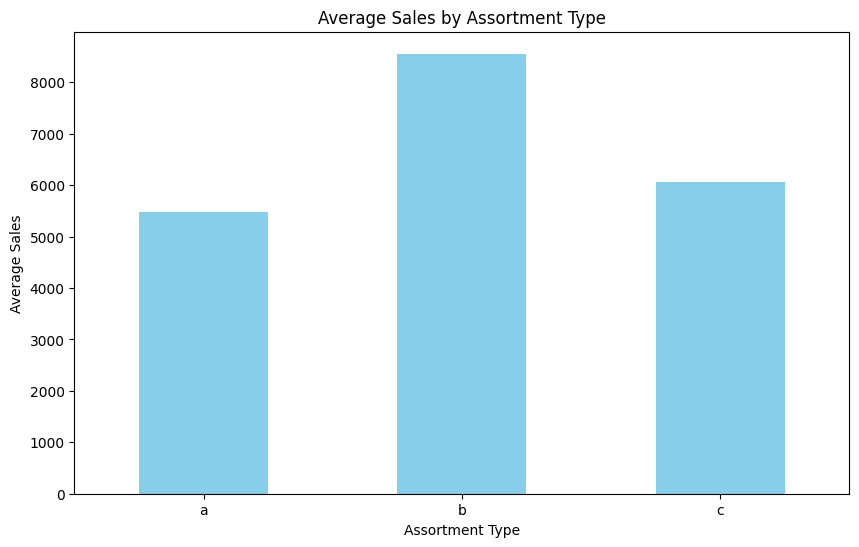

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_train = pd.read_csv('D:/week4 data/train.csv', low_memory=False)
df_store = pd.read_csv('D:/week4 data/store.csv', low_memory=False)

# Convert 'Date' column to datetime if needed
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Merge the datasets on the 'Store' column
df_merged = pd.merge(df_train, df_store, on='Store')

# Group sales data by assortment type
assortment_sales = df_merged.groupby('Assortment')['Sales'].mean()
logger.info("Average Sales by Assortment Type calculated:\n%s", assortment_sales)
print("Average Sales by Assortment Type:")
print(assortment_sales)

# Visualize the average sales by assortment type
logger.info("Creating bar plot for Average Sales by Assortment Type...")
assortment_sales.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()


2025-01-03 11:10:34,813 - INFO - Categorizing stores based on competition distance...
C:\Users\Robel\AppData\Local\Temp\ipykernel_9368\176281334.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_sales = df_merged.groupby('CompetitionDistanceCategory')['Sales'].mean()
2025-01-03 11:10:34,974 - INFO - Average Sales by Competition Distance Category calculated:
CompetitionDistanceCategory
0-500m        6307.393560
501-1000m     5565.373637
1001-1500m    5839.675095
1501-2000m    5983.777003
2001-5000m    5529.876698
Name: Sales, dtype: float64
2025-01-03 11:10:34,988 - INFO - Creating bar plot for Average Sales by Competition Distance Category...


Average Sales by Competition Distance Category:
CompetitionDistanceCategory
0-500m        6307.393560
501-1000m     5565.373637
1001-1500m    5839.675095
1501-2000m    5983.777003
2001-5000m    5529.876698
Name: Sales, dtype: float64


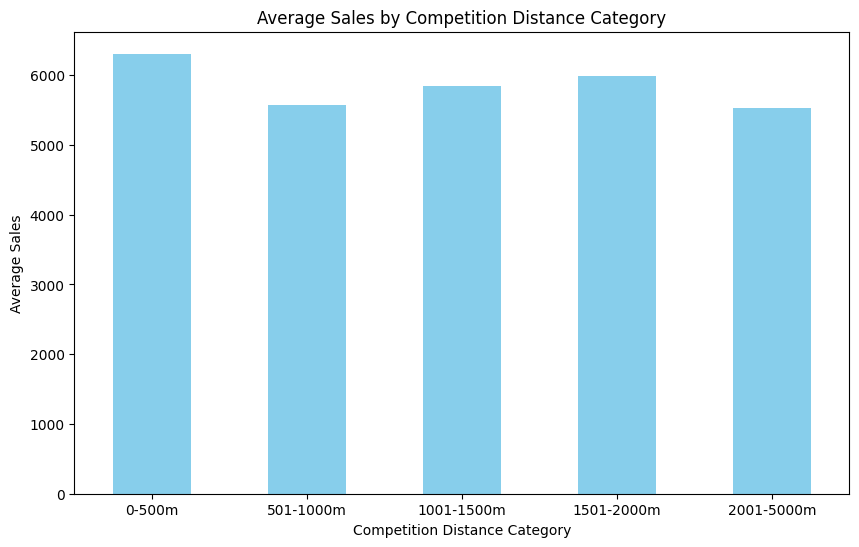

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_train = pd.read_csv('D:/week4 data/train.csv', low_memory=False)
df_store = pd.read_csv('D:/week4 data/store.csv', low_memory=False)

# Merge the datasets on the 'Store' column
df_merged = pd.merge(df_train, df_store, on='Store')

# Categorize stores based on competition distance
logger.info("Categorizing stores based on competition distance...")
bins = [0, 500, 1000, 1500, 2000, 5000]
labels = ['0-500m', '501-1000m', '1001-1500m', '1501-2000m', '2001-5000m']
df_merged['CompetitionDistanceCategory'] = pd.cut(df_merged['CompetitionDistance'], bins=bins, labels=labels)

# Group sales data by competition distance category
distance_sales = df_merged.groupby('CompetitionDistanceCategory')['Sales'].mean()
logger.info("Average Sales by Competition Distance Category calculated:\n%s", distance_sales)
print("Average Sales by Competition Distance Category:")
print(distance_sales)

# Visualize the average sales by competition distance category
logger.info("Creating bar plot for Average Sales by Competition Distance Category...")
distance_sales.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Sales by Competition Distance Category')
plt.xlabel('Competition Distance Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()


   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11

2025-01-03 11:15:34,594 - INFO - Calculating average sales before and after competitor opening dates...
2025-01-03 11:15:54,057 - INFO - Creating bar plot for average sales before and after new competitors...


      avg_sales_before  avg_sales_after  percentage_change
1                  NaN      3945.704883                NaN
2                  NaN      4122.991507                NaN
3                  NaN      5741.253715                NaN
4                  NaN      8021.769639                NaN
5          3868.880488      3855.213115          -0.353264
...                ...              ...                ...
1108               NaN      4758.597665                NaN
1109               NaN      4043.167546                NaN
1110               NaN      3766.970276                NaN
1111       4557.701550      4082.868545         -10.418256
1112               NaN      8465.280255                NaN

[761 rows x 3 columns]


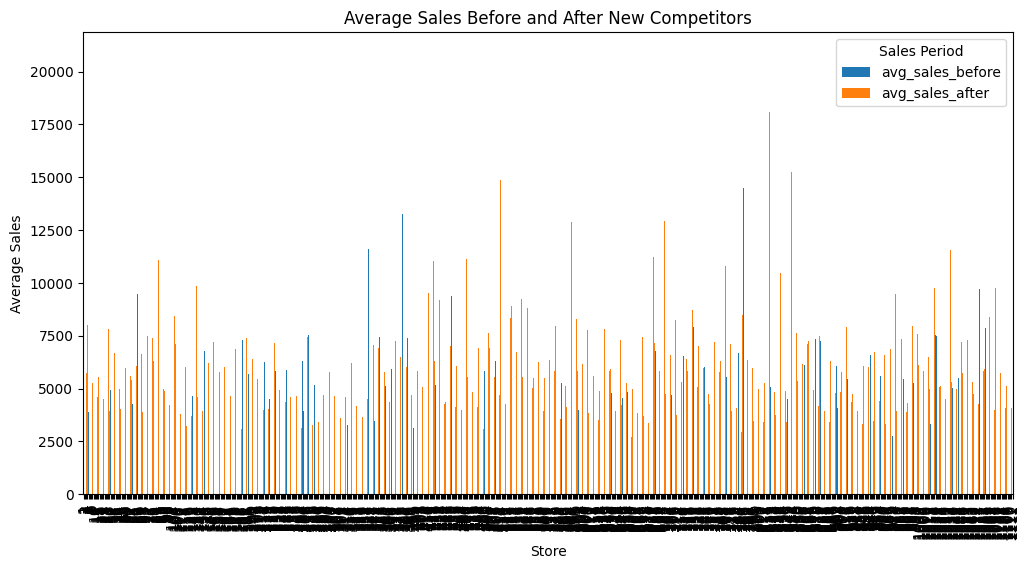

2025-01-03 11:16:03,630 - INFO - Creating bar plot for percentage change in sales due to new competitors...


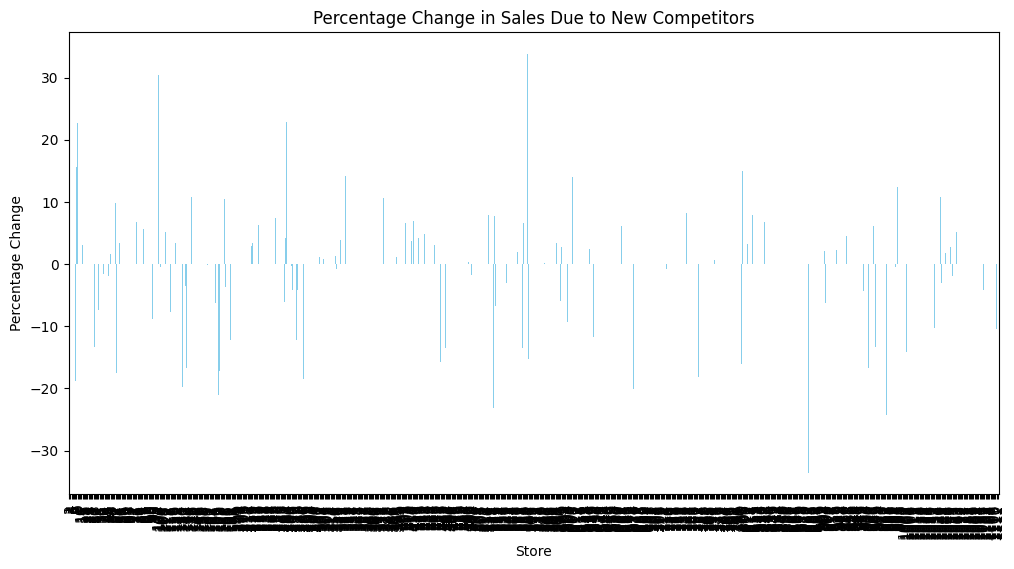

In [11]:
import pandas as pd

# Load the datasets
df_train = pd.read_csv('D:/week4 data/train.csv', low_memory=False)
df_store = pd.read_csv('D:/week4 data/store.csv', low_memory=False)

# Convert 'Date' column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Merge the datasets on the 'Store' column
df_merged = pd.merge(df_train, df_store, on='Store')

# Display the first few rows of the merged dataset to confirm the merge
print(df_merged.head())

# Create a 'CompetitionOpenDate' column with a default day value
df_store['CompetitionOpenDate'] = pd.to_datetime({
    'year': df_store['CompetitionOpenSinceYear'],
    'month': df_store['CompetitionOpenSinceMonth'],
    'day': 1
})

# Merge the datasets again
df_merged = pd.merge(df_train, df_store, on='Store')

# Filter out rows where 'CompetitionOpenDate' is NaT
df_merged = df_merged[df_merged['CompetitionOpenDate'].notna()]

# Extract year and month from 'Date' for comparison
df_merged['YearMonth'] = df_merged['Date'].dt.to_period('M')

# Identify stores with new competitors
stores_with_competitors = df_merged['Store'].unique()

# Calculate average sales before and after competitor opening dates
logger.info("Calculating average sales before and after competitor opening dates...")
avg_sales_before_after = {}

for store in stores_with_competitors:
    competitor_open_date = df_merged[df_merged['Store'] == store]['CompetitionOpenDate'].iloc[0]
    before = df_merged[(df_merged['Store'] == store) & (df_merged['Date'] < competitor_open_date)]
    after = df_merged[(df_merged['Store'] == store) & (df_merged['Date'] >= competitor_open_date)]
    
    avg_sales_before_after[store] = {
        'avg_sales_before': before['Sales'].mean(),
        'avg_sales_after': after['Sales'].mean()
    }

# Convert the result to a DataFrame
result_df = pd.DataFrame(avg_sales_before_after).T
result_df['percentage_change'] = (result_df['avg_sales_after'] - result_df['avg_sales_before']) / result_df['avg_sales_before'] * 100

print(result_df)

import matplotlib.pyplot as plt

# Bar plot for average sales before and after new competitors
logger.info("Creating bar plot for average sales before and after new competitors...")
result_df[['avg_sales_before', 'avg_sales_after']].plot(kind='bar', figsize=(12, 6))
plt.title('Average Sales Before and After New Competitors')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.legend(title='Sales Period')
plt.show()

# Bar plot for percentage change in sales
logger.info("Creating bar plot for percentage change in sales due to new competitors...")
result_df['percentage_change'].plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title('Percentage Change in Sales Due to New Competitors')
plt.xlabel('Store')
plt.ylabel('Percentage Change')
plt.show()

